In [ ]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [ ]:
raw_df = pd.read_csv('la.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 31900 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20210207181900,2021-02-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",within a day,100%,0%,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Culver City,Other Cities,33.98209,-118.38494,Entire condominium,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""Hangers"", ""Smoke alarm"", ""Cable TV"", ""Washer...",$115.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,0,0,0,0,2021-02-09,2,0,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20210207181900,2021-02-09,Runyon Canyon | Beau Furn Mir Mini-Suite Fire...,Run Runyon Canyon<br /><br />Beautifully Furni...,"Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.09768,-118.34602,Private room in apartment,Private room,1,NaN,1.5 baths,1.0,1.0,"[""Hangers"", ""Dishwasher"", ""Microwave"", ""Coffee...",$71.00,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,4,10,40,315,2021-02-09,28,5,0,2014-06-09,2020-11-08,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,0,2,0,0.34
2,2732,https://www.airbnb.com/rooms/2732,20210207181900,2021-02-09,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within a few hours,80%,43%,f,https://a0.muscache.com/im/users/3041/profile_...,https://a0.muscache.com/im/users/3041/profile_...,Santa Monica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Santa Monica, California, United States",Santa Monica,Other Cities,34.00475,-118.48127,Private room in apartment,Private room,1,NaN,1 private bath,1.0,1.0,"[""Hangers"", ""Essentials"",

In [ ]:
# Dropping initial columns
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'license'], axis=1, inplace=True)
df.set_index('id', inplace=True) # The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','latitude', 'longitude'], axis=1, inplace=True)
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

# Several columns only contain one category and can be dropped:
df.drop(['has_availability', 'host_has_profile_pic', 'bathrooms'], axis=1, inplace=True)

# Drop somemore useless shit - Only one will be retained - for 90 days
df.drop('calendar_updated', axis=1, inplace=True)
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

# These will be highly correlated with number_of_reviews and so will be dropped.
df.drop(['number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month'], axis=1, inplace=True)

# Let's ignore the effects of neighbourhood first, so let's drop those columns for now
df.drop(['neighbourhood', 'neighbourhood_cleansed'], axis=1, inplace=True)

# Drop some other bullshits
df.drop(['bathrooms_text'], axis=1, inplace=True)

df.head(3)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,2008-06-27,within a day,100%,f,1.0,t,Entire condominium,Entire home/apt,6,2.0,3.0,"[""Hangers"", ""Smoke alarm"", ""Cable TV"", ""Washer...",$115.00,30,730,0,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f
2708,2008-09-16,within an hour,100%,t,2.0,t,Private room in apartment,Private room,1,1.0,1.0,"[""Hangers"", ""Dishwasher"", ""Microwave"", ""Coffee...",$71.00,30,366,40,28,2014-06-09,2020-11-08,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t
2732,2008-09-17,within a few hours,80%,f,2.0,t,Private room in apartment,Private room,1,1.0,1.0,"[""Hangers"", ""Essentials"", ""Wifi"", ""Oven"", ""Coo...",$155.00,1,180,90,21,2011-06-06,2019-12-27,94.0,9.0,9.0,9.0,9.0,10.0,9.0,f


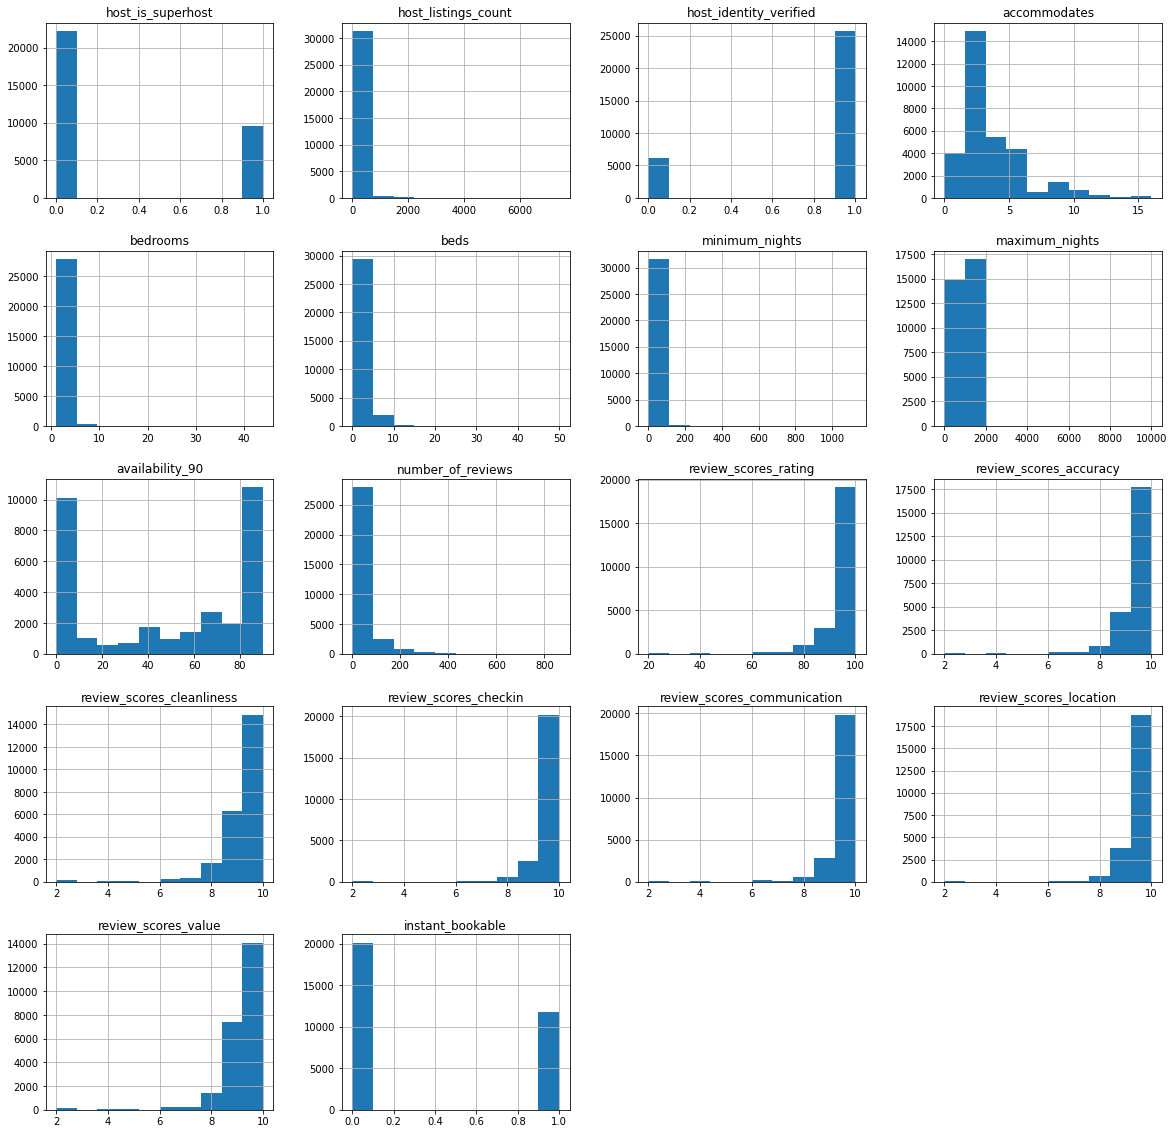

In [ ]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

Cleaning individual columns

In [ ]:
# host_since
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2020, 12, 20) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1730.0
Median days as host: 1740.0


In [ ]:
# host_response_time

print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
print(len(df[df.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2]))

Null values: 9536
Proportion: 29.9%
2984


In [ ]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.472320
unknown               0.298934
within a few hours    0.124671
within a day          0.071254
a few days or more    0.032821
Name: host_response_time, dtype: float64

In [ ]:
# host_response_rate
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 9536
Proportion: 29.9%


In [ ]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

Mean host response rate: 93.0
Median host response rate: 100.0
Proportion of 100% host response rates: 70.3%


100%       15712
unknown     9536
50-89%      2656
90-99%      2656
0-49%       1340
Name: host_response_rate, dtype: int64

In [ ]:
# property_type
# Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories 'apartment', 'house' and 'other' will be used, as most properties can be classified as either apartments or houses.
df.property_type.value_counts()

Entire apartment             7959
Entire house                 5539
Private room in house        4643
Private room in apartment    2371
Entire guesthouse            1734
                             ... 
Shared room in tent             1
Private room in chalet          1
Private room in yurt            1
Shared room in igloo            1
Room in bed and breakfast       1
Name: property_type, Length: 101, dtype: int64

In [ ]:
# Cleaning property_type
# three types: House, Apartment, and Hotel
df.property_type.replace({
    'Entire house': 'House',
    'Private room in house': 'House',
    'Entire townhouse': 'House',
    'Private room in townhouse': 'House',
    'Entire guesthouse': 'House',
    'Shared room in house': 'House',
    'Private room in guesthouse': 'House',
    'Tiny house': 'House',
    'Private room in tiny house': 'House',
    'Earth house': 'House',
    'Entire villa': 'House',
    'Private room in villa': 'House',
    'Private room in cottage': 'House',
    'Entire cottage': 'House',
    'Entire bungalow': 'House',
    'Private room in bungalow': 'House',
    'Shared room in bungalow': 'House',
    'Private room in farm stay': 'House',
    'Entire home/apt': 'House',
    
    'Entire apartment': 'Apartment',
    'Private room in apartment': 'Apartment',
    'Entire serviced apartment': 'Apartment',
    'Shared room in apartment': 'Apartment',
    'Room in serviced apartment': 'Apartment',
    'Private room in serviced apartment': 'Apartment',
    'Shared room in serviced apartment': 'Apartment',
    'Entire loft': 'Apartment',
    'Private room in loft': 'Apartment',
    'Shared room in loft': 'Apartment',
    'Entire condominium': 'Apartment',
    'Private room in condominium': 'Apartment',
    'Shared room in condominium': 'Apartment',
    'Entire apartment': 'Apartment', 
    'Private room in bed and breakfast': 'Apartment',
    'Private room in bed and breakfast': 'Apartment',
    
    'Room in boutique hotel': 'Hotel',
    'Room in hotel': 'Hotel',
    'Room in aparthotel': 'Hotel',
    'Room in hostel': 'Hotel',
    'Shared room in hostel': 'Hotel',
    'Private room in guest suite': 'Hotel',
    'Entire guest suite': 'Hotel'
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment','Hotel']), 'property_type'] = 'Other'

In [ ]:
df.room_type.value_counts()

Entire home/apt    20762
Private room        9923
Shared room         1070
Hotel room           145
Name: room_type, dtype: int64

In [ ]:
df.property_type.isna().count()

31900

In [ ]:
# bathrooms, bedrooms and beds
for col in ['bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# Amenities
df.amenities[:1].values

array(['["Hangers", "Smoke alarm", "Cable TV", "Washer", "Free parking on premises", "Fire extinguisher", "First aid kit", "Hair dryer", "Air conditioning", "Dryer", "Shampoo", "Iron", "Hot tub", "Essentials", "Indoor fireplace", "Wifi", "Elevator", "Kitchen", "Carbon monoxide alarm", "Pool", "Gym", "TV", "Heating", "Dedicated workspace", "Long term stays allowed"]'],
      dtype=object)

In [ ]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities.values)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'Dedicated workspace',
 '',
 'Sony  sound system',
 'SONOS - In every room Bluetooth sound system',
 'We have a small stereo you can use in the living room sound system',
 'Costco body soap',
 'regular body soap',
 'Freezer',
 'Onsite restaurant \\u2014 The Dining Room',
 'Ethernet connection',
 'Free parking garage on premises \\u2013 1 space',
 'Spa',
 'Children\\u2019s dinnerware',
 'HDTV with HBO Max',
 'TV with Apple TV',
 'Clothing storage: dresser and closet',
 'Covered parking',
 'Large Thermador  refrigerator',
 'Smoking allowed',
 'Free washer\\u2013In building',
 'Full Size stove',
 'Paid parking garage on premises \\u2013 50 spaces',
 'Bertazzoni stainless steel gas stove',
 'Marshall Bluetooth sound system',
 'Bath & Body Works body soap',
 'Miele stainless steel oven',
 '33\\ HDTV with premium cable',
 'General Electric refrigerator',
 'and walk-in closet',
 'Beach essentials',
 'Byrd  toiletries',
 'As side burner on gas grill gas stove',
 '75\\ HDTV with Netflix',
 'li

In [ ]:
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
df.iloc[:,29]

id
109        NaN
2708       NaN
2732       NaN
2864       NaN
5728       NaN
            ..
48070933   NaN
48070985   NaN
48071306   NaN
48071488   NaN
48072320   NaN
Name: high_end_electronics, Length: 31900, dtype: float64

In [ ]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,29:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,29:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['high_end_electronics', 'nature_and_views', 'breakfast', 'child_friendly', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


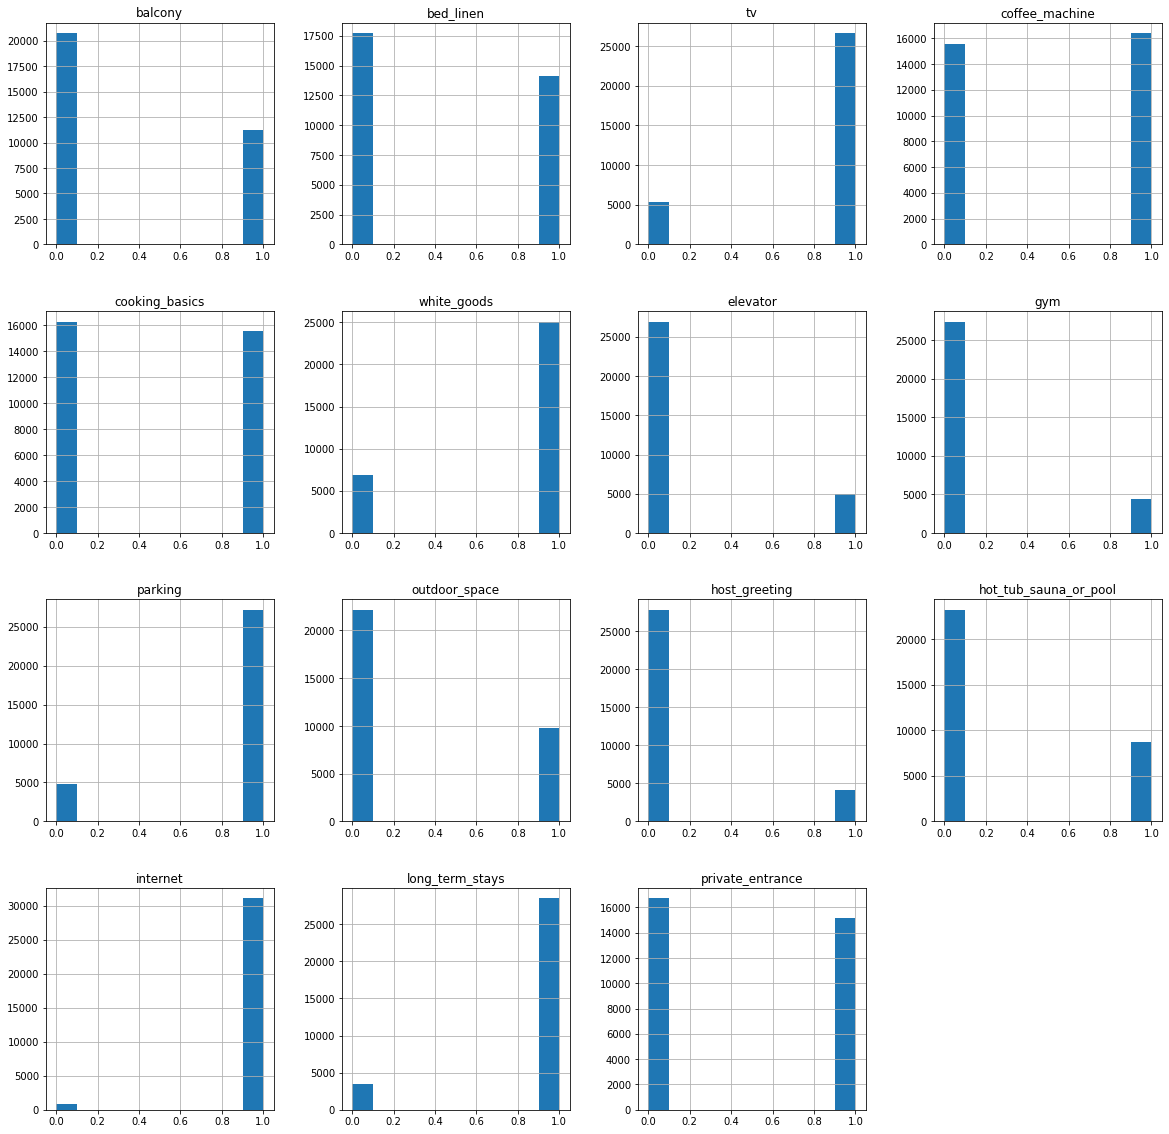

In [ ]:
# Amenities graph
df.iloc[:,29:].hist(figsize=(20,20));

In [ ]:
for col in df.iloc[:,29:].columns:
    print("Proportion without", col,":",round((len(df[df[col]==0])/len(df))*100,1),"%")

Proportion without balcony : 65.0 %
Proportion without bed_linen : 55.6 %
Proportion without tv : 16.6 %
Proportion without coffee_machine : 48.6 %
Proportion without cooking_basics : 51.1 %
Proportion without white_goods : 21.4 %
Proportion without elevator : 84.5 %
Proportion without gym : 86.0 %
Proportion without parking : 14.9 %
Proportion without outdoor_space : 69.4 %
Proportion without host_greeting : 87.2 %
Proportion without hot_tub_sauna_or_pool : 72.8 %
Proportion without internet : 2.6 %
Proportion without long_term_stays : 10.8 %
Proportion without private_entrance : 52.4 %


In [ ]:
# price
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [ ]:
df.availability_90.describe()

count    31900.000000
mean        47.948934
std         37.649554
min          0.000000
25%          0.000000
50%         59.000000
75%         87.000000
max         90.000000
Name: availability_90, dtype: float64

Null values in 'first_review': 24.1%
Null values in 'review_scores_rating': 25.2%


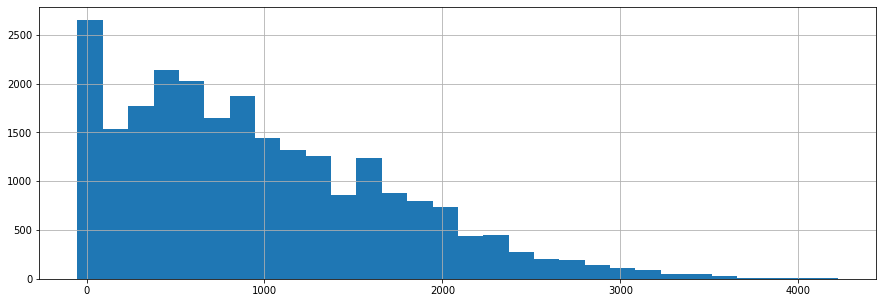

In [ ]:
# first_review and last_review

# About a quarter of listings have not had a review written for them. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information - reviews are very important in people's decisions to book, and therefore price.
# This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially. Also, the missing values here are not really missing values, as the fact that they are NaNs is meaningful - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model work able to predict prices for any Airbnb listing, including brand new listings, is is actually beneficial to keep them in. Therefore, these will be kept as an 'unknown' category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2020, 12, 20) - df.first_review).astype('timedelta64[D]')

# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [ ]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

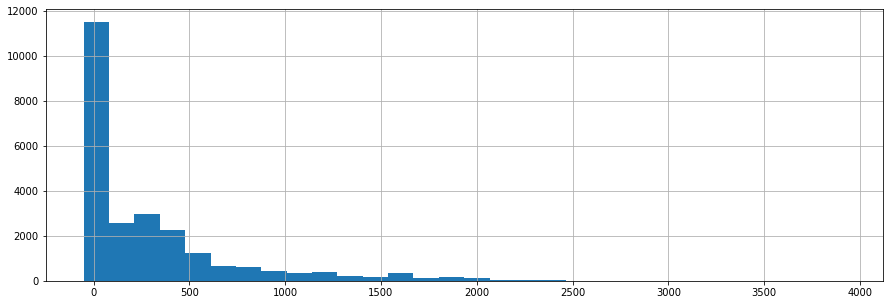

In [ ]:
# The same process will be followed for last_review:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (datetime(2020, 12, 20) - df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

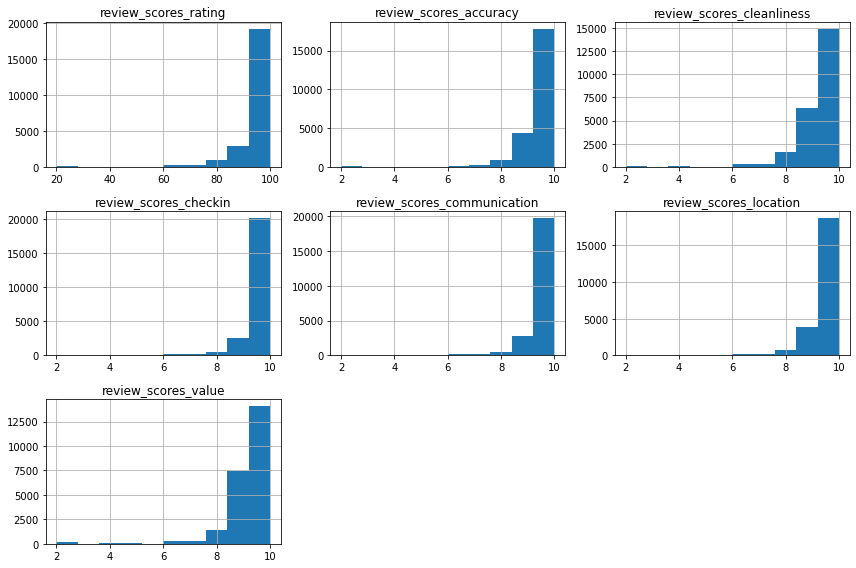

In [ ]:
# Review ratings columns

# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [ ]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 5, 8, 9, 10],
               labels=['0-5/10','8/10', '9/10', '10/10'],
               na_label='no reviews')
    
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 50, 80, 95, 100],
           labels=['0-49/100', '50-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [ ]:
df.head(3)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days_active,air_conditioning,bbq,balcony,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,2008-06-27,within a day,100%,0.0,1.0,1.0,Apartment,Entire home/apt,6,2.0,3.0,115,30,730,0,2,2011-08-15,50-79/100,10/10,10/10,8/10,8/10,10/10,8/10,0,4559.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4+ years,1+ year
2708,2008-09-16,within an hour,100%,1.0,2.0,1.0,Apartment,Private room,1,1.0,1.0,71,30,366,40,28,2014-06-09,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,1,4478.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4+ years,2-8 weeks
2732,2008-09-17,within a few hours,50-89%,0.0,2.0,1.0,Apartment,Private room,1,1.0,1.0,155,1,180,90,21,2011-06-06,80-94/100,9/10,9/10,9/10,9/10,10/10,9/10,0,4477.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4+ years,6-12 months


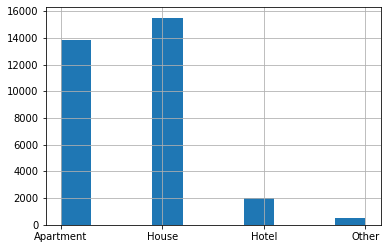

In [ ]:
# Property type graph
df.property_type.hist();

In [ ]:
df[df.isna().any(axis=1)]

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days_active,air_conditioning,bbq,balcony,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2732,2008-09-17,within a few hours,50-89%,0.0,2.0,1.0,Apartment,Private room,1,1.0,1.0,155,1,180,90,21,2011-06-06,80-94/100,9/10,9/10,9/10,9/10,10/10,9/10,0,4477.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4+ years,6-12 months
2864,2008-09-25,unknown,unknown,0.0,1.0,1.0,Apartment,Entire home/apt,2,1.0,1.0,50,30,730,0,0,NaT,nan,nan,nan,nan,nan,nan,nan,1,4469.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,nan,nan
5728,2009-03-05,within a few hours,100%,1.0,8.0,1.0,House,Private room,2,1.0,1.0,42,30,1125,1,310,2009-07-17,95-100/100,10/10,10/10,10/10,10/10,10/10,9/10,0,4308.0,NaN,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,4+ years,6-12 months
5729,2009-03-05,within a few hours,100%,1.0,8.0,1.0,House,Private room,3,1.0,1.0,65,30,1125,39,230,2009-08-31,80-94/100,9/10,10/10,10/10,10/10,10/10,9/10,0,4308.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,4+ years,6-12 months
5843,2009-03-05,within a few hours,100%,1.0,8.0,1.0,House,Entire home/apt,4,2.0,2.0,130,30,90,0,128,2011-05-17,80-94/100,10/10,10/10,10/10,10/10,10/10,9/10,0,4308.0,NaN,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4+ years,2-6 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48070933,2021-02-06,unknown,unknown,0.0,5.0,1.0,House,Private room,2,1.0,1.0,36,1,7,90,0,NaT,nan,nan,nan,nan,nan,nan,nan,1,-48.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,nan,nan
48070985,2021-02-06,unknown,unknown,0.0,5.0,1.0,House,Private room,2,1.0,1.0,28,1,7,89,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,-48.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,nan,nan
48071306,2016-12-11,within an hour,100%,0.0,1.0,1.0,Apartment,Entire home/apt,6,2.0,3.0,176,1,1125,90,0,NaT,nan,nan,nan,nan,nan,nan,nan,1,1470.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,nan,nan


In [ ]:
df.fillna(value="unknown", inplace=True)

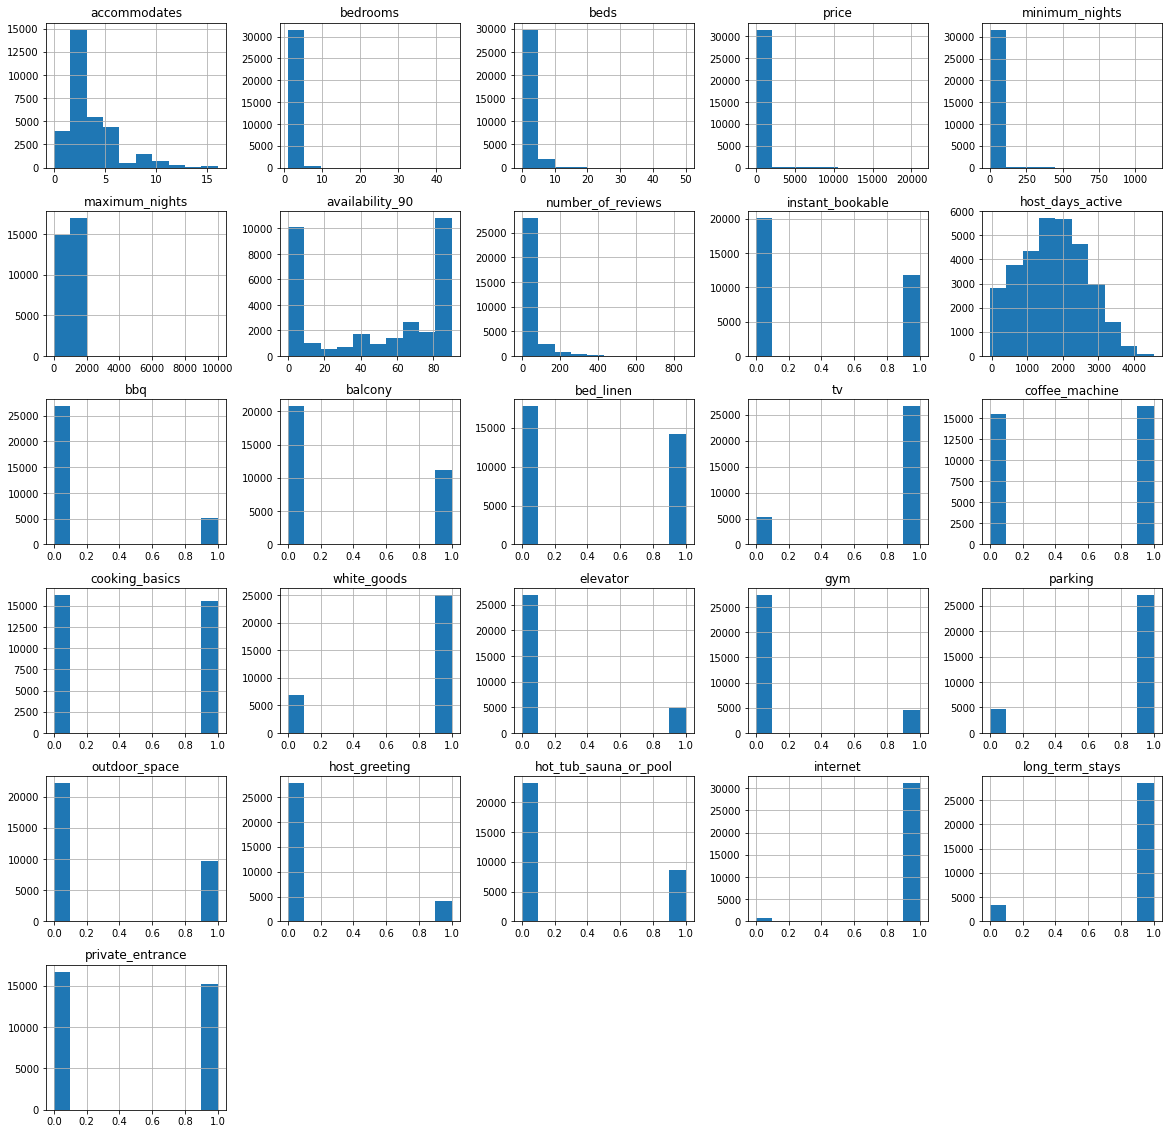

In [ ]:
df.hist(figsize=(20,20));

In [ ]:
# Drop host_since and first_review, we don't need these two anymore
df.drop(['host_since', 'first_review'], axis=1, inplace=True)

In [ ]:
# Convert catogorical data with one-hot encoding
transformed_df = pd.get_dummies(df)

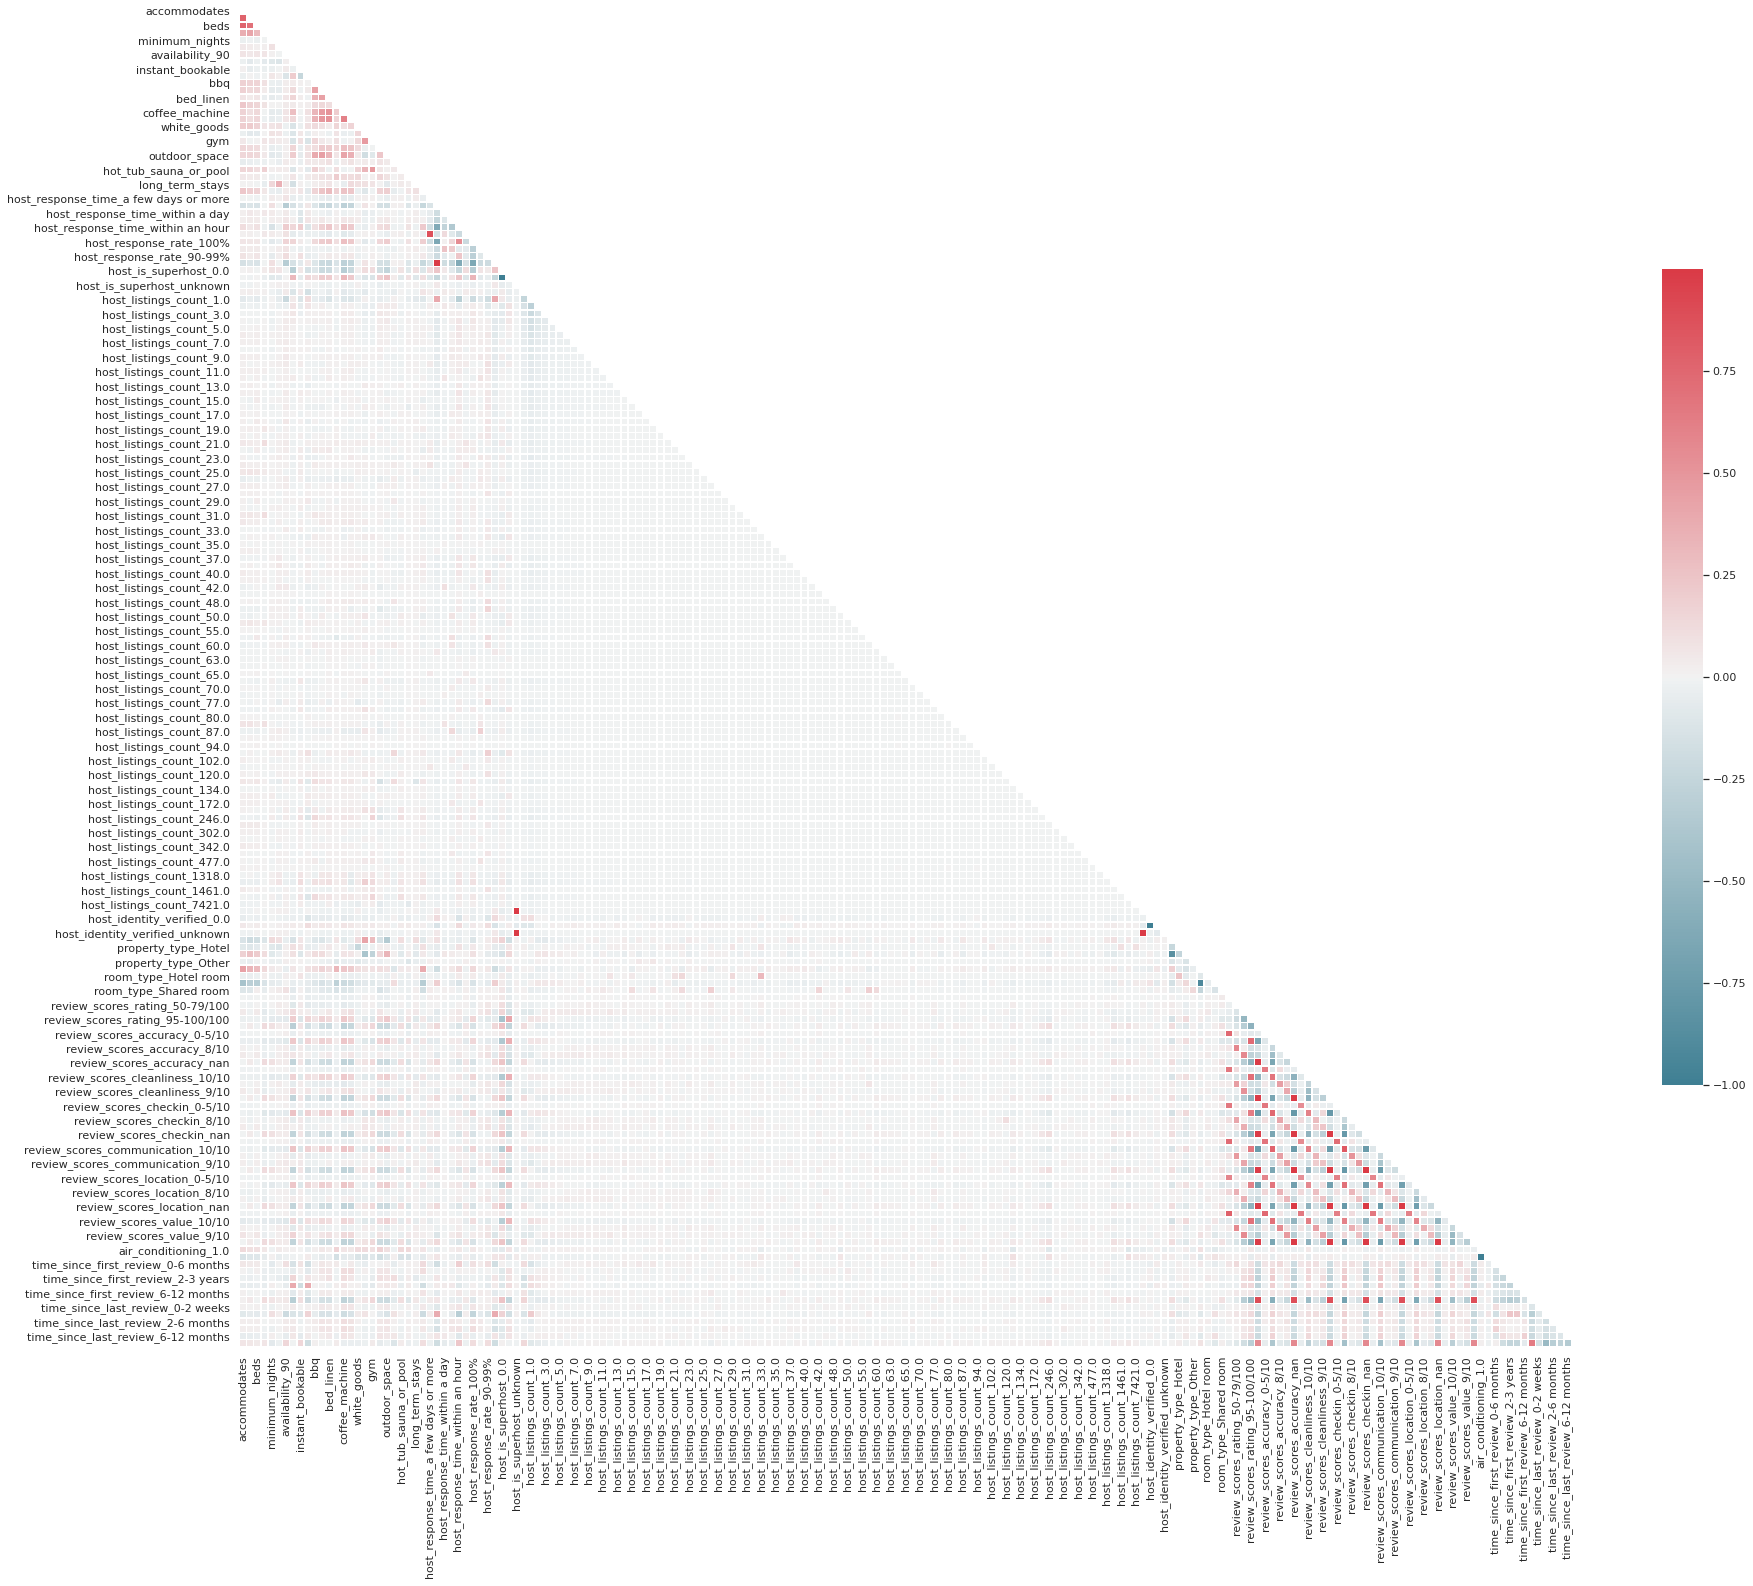

In [ ]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());
    
multi_collinearity_heatmap(transformed_df, figsize=(30,30))

In [ ]:
# Drop price outliers
transformed_df.drop(transformed_df[transformed_df.price>(transformed_df.price.mean()+3*transformed_df.price.std())].index,inplace=True)

# Drop prices that seems like per-person prices instead of one-nice price
transformed_df.drop(transformed_df[transformed_df.price/transformed_df.accommodates<12].index,inplace=True)

In [ ]:
transformed_df

,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,bbq,balcony,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0-49%,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,host_response_rate_unknown,host_is_superhost_0.0,...,review_scores_cleanliness_8/10,review_scores_cleanliness_9/10,review_scores_cleanliness_nan,review_scores_checkin_0-5/10,review_scores_checkin_10/10,review_scores_checkin_8/10,review_scores_checkin_9/10,review_scores_checkin_nan,review_scores_communication_0-5/10,review_scores_communication_10/10,review_scores_communication_8/10,review_scores_communication_9/10,review_scores_communication_nan,review_scores_location_0-5/10,review_scores_location_10/10,review_scores_location_8/10,review_scores_location_9/10,review_scores_location_nan,review_scores_value_0-5/10,review_scores_value_10/10,review_scores_value_8/10,review_scores_value_9/10,review_scores_value_nan,air_conditioning_1.0,air_conditioning_unknown,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_first_review_nan,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months,time_since_last_review_nan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,6,2.0,3.0,115,30,730,0,2,0,4559.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2708,1,1.0,1.0,71,30,366,40,28,1,4478.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2732,1,1.0,1.0,155,1,180,90,21,0,4477.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2864,2,1.0,1.0,50,30,730,0,0,1,4469.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
5728,2,1.0,1.0,42,30,1125,1,310,0,4308.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48070933,2,1.0,1.0,36,1,7,90,0,1,-48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
48070985,2,1.0,1.0,28,1,7,89,0,0,-48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
48071306,6,2.0,3.0,176,1,1125,90,0,1,1470.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
transformed_df.to_csv("la_cleaned1.csv")

Standardising and normalising

In [ ]:
numerical_columns = ['accommodates', 'host_listings_count_1.0',
                     'bedrooms', 'beds', 'price', 'maximum_nights', 'minimum_nights', 
                     'number_of_reviews', 'availability_90','host_days_active']

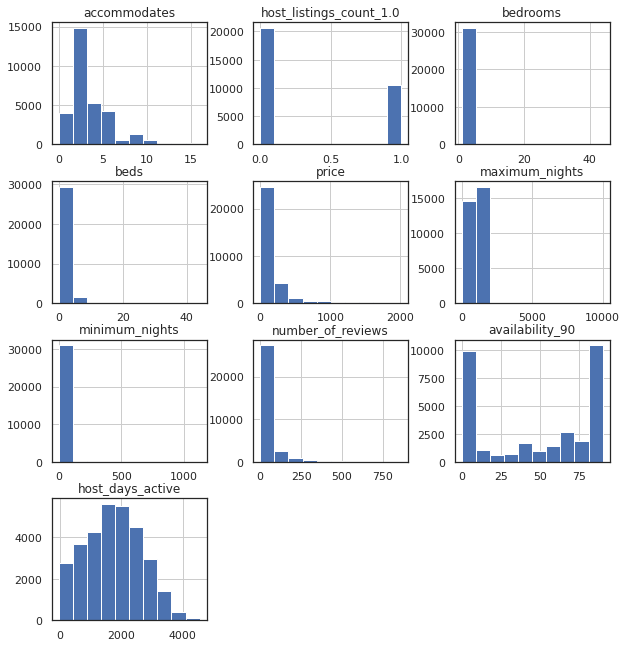

In [ ]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [ ]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

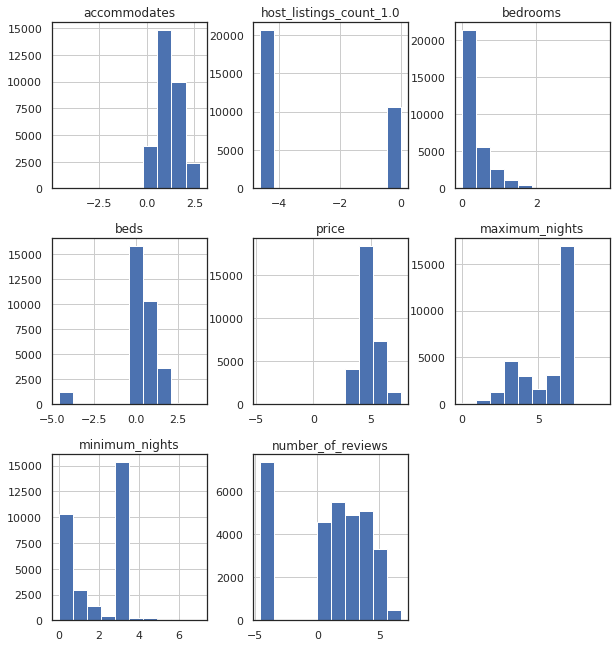

In [ ]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [ ]:
transformed_df.to_csv("la_cleaned.csv")